# Lab 2
### Kirill Zakharov

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline
from Libraries.features import CHurst, CEmbDim, KSEntr, HurstTraj, DimEmb
from scipy.stats import entropy

from sklearn.manifold import TSNE
import plotly.express as px
import nolds
from nolitsa import dimension, delay
from giottotda.gtda.time_series import embedding, TakensEmbedding
from sklearn.cluster import AgglomerativeClustering

plt.style.use('ggplot')

In [318]:
data = pd.read_csv('zeus.us.txt')['Close'].values

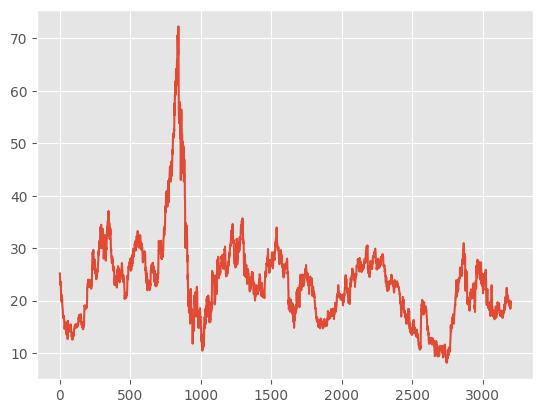

In [319]:
plt.plot(data)

plt.show()

In [320]:
nolds.hurst_rs(data)

0.9426639780884895

In [321]:
optimal_time_delay, optimal_embedding_dimension = embedding.takens_embedding_optimal_parameters(
    data, 100, 10, stride=1
    )

In [322]:
phase_traj = TakensEmbedding(optimal_time_delay, 3).fit_transform(data.reshape(1, -1))[0]

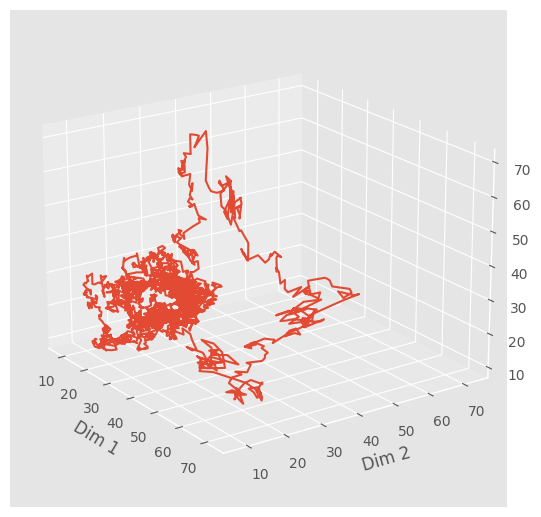

In [323]:
ax = plt.figure(figsize=(5, 5), dpi=100).add_subplot(projection='3d')

ax.plot(phase_traj[:, 0], phase_traj[:, 1], phase_traj[:, 2])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

ax.view_init(elev=20., azim=-35, roll=0)
plt.tight_layout(pad=0.1)
plt.show()

In [324]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

clustering.fit(phase_traj)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [325]:
phase_traj_w_cl = pd.concat([pd.DataFrame(phase_traj, columns=['x', 'y', 'z']), pd.DataFrame(clustering.labels_.reshape(-1, 1), columns=['cluster'])], axis=1)

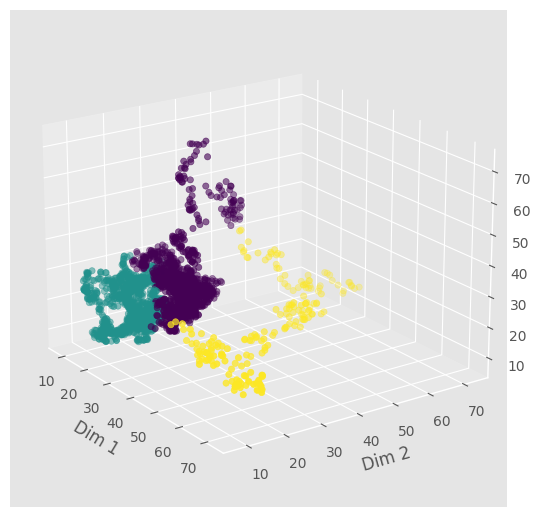

In [326]:
ax = plt.figure(figsize=(5, 5), dpi=100).add_subplot(projection='3d')

ax.scatter(phase_traj_w_cl['x'], phase_traj_w_cl['y'], phase_traj_w_cl['z'], c=phase_traj_w_cl['cluster'])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

ax.view_init(elev=20., azim=-35, roll=0)
plt.tight_layout(pad=0.1)
plt.show()

In [327]:
reconstruct_data = np.concatenate([phase_traj_w_cl['x'].values, phase_traj_w_cl['y'][-98:].values, phase_traj_w_cl['z'][-98:].values])

In [328]:
new_cl = np.concatenate([phase_traj_w_cl.cluster.values, phase_traj_w_cl.cluster.values[-98:], phase_traj_w_cl.cluster.values[-98:]])

In [333]:
df = pd.DataFrame(np.array([reconstruct_data, new_cl]).T, columns=['data', 'cl'])

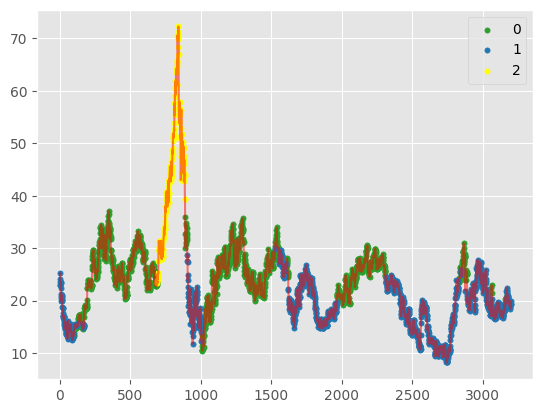

In [346]:
plt.plot(data, alpha=0.5, color='red')
col_array = ['tab:green', 'tab:blue', 'yellow']

for i in range(3):
    plt.scatter(df[df['cl'] == i]['data'].index, df[df['cl'] == i]['data'], c=col_array[i], s=14, label=i)

plt.legend()
plt.show()

In [190]:
# plt.plot(phase_traj_w_cl['x'], alpha=0.5)

# plt.scatter(np.arange(len(phase_traj_w_cl['x'])), phase_traj_w_cl['x'], c=phase_traj_w_cl.cluster, s=14)

# plt.show()

In [275]:
# prob = []
# for i in range(3):
#     temp, _ = np.histogram(phase_traj_w_cl[phase_traj_w_cl['cluster'] == i][['x', 'y', 'z']], density=True, bins=len(data)//2)
#     prob.append(entropy(temp, base=2))

In [356]:
prob = []
for i in range(3):
    temp, _ = np.histogram(df[df['cl'] == i]['data'], density=True, bins=len(df[df['cl'] == i])//2)
    prob.append(KSEntr(temp))

In [357]:
prob

[2.7655278963807217, 3.330178505009476, 2.644128201121991]

In [361]:
prob = []
for i in range(3):
    temp, _ = np.histogram(df[df['cl'] == i]['data'], density=True, bins=len(data))
    prob.append(entropy(temp, base=2))

In [362]:
max(prob)

9.868969836996552

In [363]:
KSEntr(data)

9.937956981309764

### С оптимальной размерностью вложения

In [289]:
phase_traj = TakensEmbedding(optimal_time_delay, optimal_embedding_dimension).fit_transform(data.reshape(1, -1))[0]
tsne = TSNE(n_components=2)
phase_traj_proj = tsne.fit_transform(phase_traj)

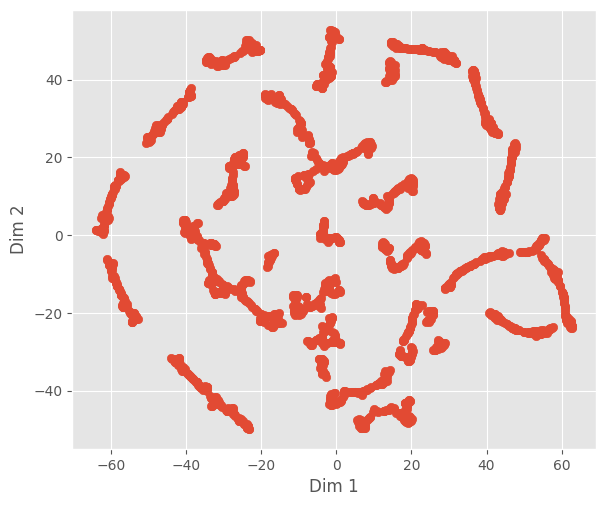

In [290]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

ax.scatter(phase_traj_proj[:, 0], phase_traj_proj[:, 1])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')

plt.tight_layout(pad=0.5)
plt.show()

In [291]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')

clustering.fit(phase_traj)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [292]:
phase_traj_w_cl = pd.concat([pd.DataFrame(phase_traj, columns=[i for i in range(6)]), pd.DataFrame(clustering.labels_.reshape(-1, 1), columns=['cluster'])], axis=1)

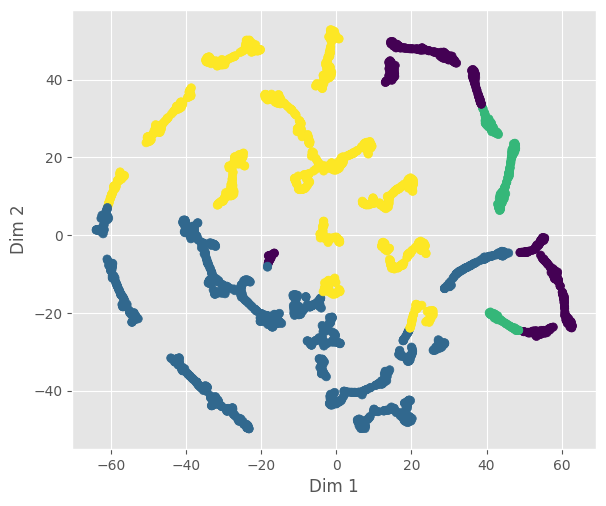

In [293]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

ax.scatter(phase_traj_proj[:, 0], phase_traj_proj[:, 1], c=phase_traj_w_cl['cluster'])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')

plt.tight_layout(pad=0.5)
plt.show()

In [294]:
phase_traj_w_cl

,0,1,2,3,4,5,cluster
0,25.180,13.369,23.106,29.998,23.954,26.282,1
1,24.217,13.855,23.205,29.998,24.617,26.370,1
2,23.488,14.343,23.284,31.196,24.004,26.045,1
3,23.013,14.313,23.320,31.436,24.607,26.213,1
4,23.004,14.779,23.205,31.543,24.392,26.436,1
...,...,...,...,...,...,...,...
2706,11.124,19.239,20.070,23.745,17.280,18.860,1
2707,10.956,19.149,20.050,22.828,17.470,18.450,1
2708,11.174,19.049,18.944,22.429,17.420,19.910,1
2709,11.243,20.443,19.343,21.412,17.800,19.410,1


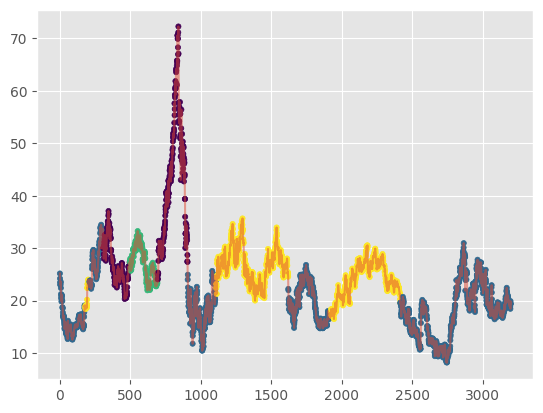

In [295]:
reconstruct_data = np.concatenate([phase_traj_w_cl[0].values, np.concatenate([phase_traj_w_cl[i].values[-optimal_time_delay:] for i in range(1, 6)])])
new_cl = np.concatenate([phase_traj_w_cl.cluster.values,np.repeat(phase_traj_w_cl.cluster.values[-98:], 5)])

plt.plot(data, alpha=0.5)

plt.scatter(np.arange(len(reconstruct_data)), reconstruct_data, c=new_cl, s=14)

plt.show()

In [296]:
df = pd.DataFrame(np.array([reconstruct_data, new_cl]).T, columns=['data', 'cl'])

In [314]:
# prob = []
# for i in range(4):
#     temp, _ = np.histogram(phase_traj_w_cl[phase_traj_w_cl['cluster'] == i][[i for i in range(4)]], density=True, bins=len(phase_traj_w_cl[phase_traj_w_cl['cluster'] == i]))
#     prob.append(entropy(temp, base=2))

prob = []
for i in range(4):
    temp, _ = np.histogram(df[df['cl'] == i]['data'], density=True, bins=len(data))
    prob.append(entropy(temp, base=2))

In [315]:
prob

[8.425034725766224, 9.923817122771785, 7.416980826247073, 9.45801342237354]

In [316]:
max(prob)

9.923817122771785

In [312]:
KSEntr(data)

9.937956981309764